## Calibration Plot Example

Extracted from the [caret Package](http://www.inside-r.org/packages/cran/caret/docs/xyplot.calibration)

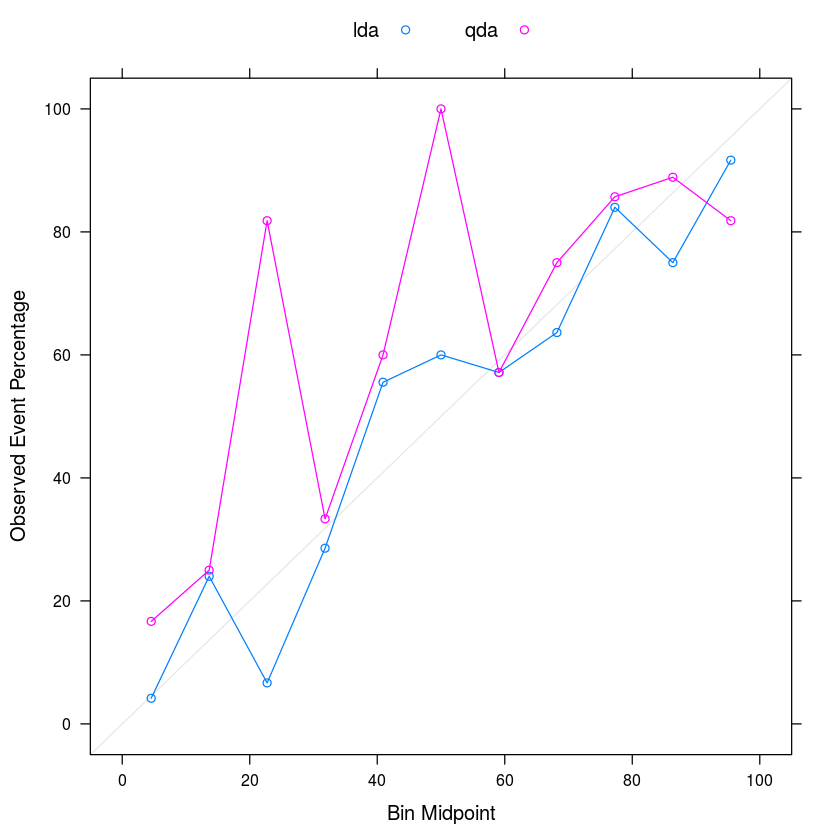

In [2]:
set.seed(0) 
require(caret)
data(mdrr)
mdrrDescr <- mdrrDescr[, -nearZeroVar(mdrrDescr)]
mdrrDescr <- mdrrDescr[, -findCorrelation(cor(mdrrDescr), .5)]
 
 
inTrain <- createDataPartition(mdrrClass)
trainX <- mdrrDescr[inTrain[[1]], ]
trainY <- mdrrClass[inTrain[[1]]]
testX <- mdrrDescr[-inTrain[[1]], ]
testY <- mdrrClass[-inTrain[[1]]]
 
library(MASS)
 
ldaFit <- lda(trainX, trainY)
qdaFit <- qda(trainX, trainY)
 
testProbs <- data.frame(obs = testY,
                        lda = predict(ldaFit, testX)$posterior[,1],
                        qda = predict(qdaFit, testX)$posterior[,1])
 
 
calPlotData <- calibration(obs ~ lda + qda, data = testProbs)
 
xyplot(calPlotData, auto.key = list(columns = 2))